# Keras Tutorial: Classifying Hand-written Digits

Robert Giaquinto

4/22/2020

UMN CSci 4511W Week 13: Deep Learning

## Goals:
- Load and prepare images data (hand-written digits)
- Create a *convolutional neural network* to map raw images to their corresponding digit
- Train the model, evaluate it's performance
- Try out the model on new data

![title](images/cnn.png)

### Instructions for running:

1. Activate your virtual environment, just like in the homework
2. Install the modeling libraries:
    
    `pip install keras tensorflow imageio`
    
    
3. Launch this notebook:
    
    `jupyter notebook Keras_Tutorial.ipynb`
    
    
4. Have fun!

## Import libraries

In [1]:
import keras
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.models import load_model

from pickle import dump, load
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(123)

Using TensorFlow backend.


In [2]:
%matplotlib inline

## Data Preperation

Input Image | Data Representation
- | - 
![title](images/cats.png) | ![title](images/pixels.png)

In [3]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("train_images shape:", train_images.shape)
print("train_labels shape:", train_labels.shape)
print("test_images shape:", test_images.shape)
print("test_labels shape:", test_labels.shape)

train_images shape: (60000, 28, 28)
train_labels shape: (60000,)
test_images shape: (10000, 28, 28)
test_labels shape: (10000,)


IMAGE LABEL: 5


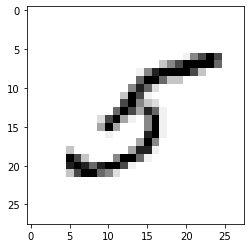

In [4]:
image_index = 35
print("IMAGE LABEL:", train_labels[image_index])
plt.imshow(train_images[image_index], cmap='Greys')
plt.show()

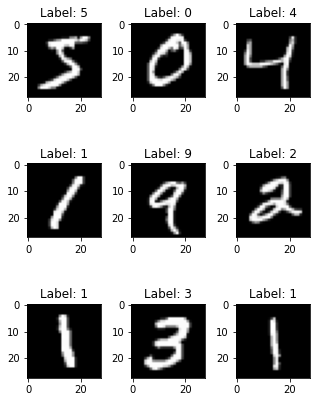

In [5]:
# examime multiple images and their label
num_images = 9
num_row = 3
num_col = 3
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_images):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(train_images[i], cmap='gray')
    ax.set_title('Label: {}'.format(train_labels[i]))
plt.tight_layout()
plt.show()

In [6]:
print("First 10 training labels:", train_labels[0:10])

First 10 training labels: [5 0 4 1 9 2 1 3 1 4]


In [7]:
# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

num_classes = 10

## Model: Convolutional Neural Network

![title](images/cnn_images.jpeg)

![title](images/convolution_filter.png)

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [10]:
batch_size = 128
epochs = 2   # Only running for a short period as an example. 10 or 20 epochs is better

model.compile(loss='categorical_crossentropy',
              optimizer='adam',  # sgd which is stochastic gradient descent
              metrics=['accuracy'])

training_progress = model.fit(train_images, train_labels,
                              batch_size=batch_size,
                              epochs=epochs,
                              validation_split=0.2,  # while training: track progress on a set of "validation" data
                              verbose=1)



Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 45s 933us/step - loss: 0.3518 - accuracy: 0.8890 - val_loss: 0.0831 - val_accuracy: 0.9752
Epoch 2/2
48000/48000 [==============================] - 41s 849us/step - loss: 0.1185 - accuracy: 0.9650 - val_loss: 0.0539 - val_accuracy: 0.9843


### Save model for future use

In [ ]:
# Save final model
#model.save("my_model.h5")

#with open('training_progress', 'wb') as handle: # saving the history of the model
#    dump(training_progress.history, handle)

### Load model

In [9]:
model = load_model("my_model.h5")

with open('training_progress', 'rb') as handle: # loading old history 
    training_progress = load(handle)

### Evaluate model performance on the held-out test set

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 2s 194us/step
Test loss: 0.027594990214535937
Test accuracy: 0.9901000261306763


In [11]:
def plot_model_history(model_history):
    if type(model_history) is not dict:
        model_history = model_history.history
    
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history['accuracy'])+1),model_history['accuracy'])
    axs[0].plot(range(1,len(model_history['val_accuracy'])+1),model_history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history['loss'])+1),model_history['loss'])
    axs[1].plot(range(1,len(model_history['val_loss'])+1),model_history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    

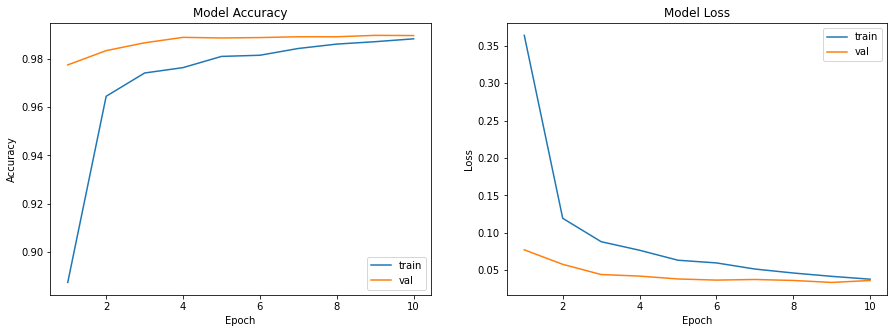

In [12]:
# plot model history
plot_model_history(training_progress)

## Test Out Model on New Data!

Size of new image: (28, 28)


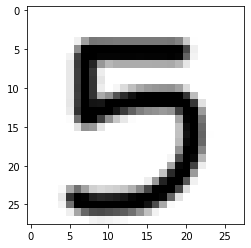

In [13]:
import imageio
import numpy as np
from matplotlib import pyplot as plt

# read in an image from the web
im = imageio.imread("https://i.imgur.com/a3Rql9C.png")

# convert it to a grayscale image
new_image = np.dot(im[...,:3], [0.299, 0.587, 0.114])
print("Size of new image:", new_image.shape)

plt.imshow(new_image, cmap = plt.get_cmap('gray'))
plt.show()


### Apply the same pre-processing steps to the image

In [14]:
# reshape the image
new_image = new_image.reshape(1, 28, 28, 1)

# normalize image
new_image /= 255

In [15]:
# predict digit
prediction = model.predict(new_image)
print(prediction.argmax())


5
